##### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Ethylene Oxide Flowsheet

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the formulation and solution of material balances for an ethylene oxide flowsheet using the [symbolic algebra package Sympy](http://sympy.org/en/index.html).

## Introduction

While material balances for chemical processes are readily expressed as linear equations, extracting the matrix of coefficients for the linear equations can be tedious and error-prone. Fortunately, symbolic calculations can be used to solve material balance problems typical of introductory chemical engineering courses. This is demonstrated below using an example from the textbook [*
Introduction to Chemical Processes: Principles, Analysis, and Synthesis*](http://highered.mcgraw-hill.com/sites/0072849606/) by Regina Murphy.

## Ethylene Oxide

<p><a href="http://commons.wikimedia.org/wiki/File:TASNEE_001.jpg#/media/File:TASNEE_001.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/TASNEE_001.jpg/1200px-TASNEE_001.jpg" alt="TASNEE 001.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:TASNEE_001.jpg#/media/File:TASNEE_001.jpg">TASNEE 001</a>" by <a href="//commons.wikimedia.org/w/index.php?title=User:Secl&amp;action=edit&amp;redlink=1" class="new" title="User:Secl (page does not exist)">Secl</a> - <span class="int-own-work" lang="en">Own work</span>. Licensed under <a href="http://creativecommons.org/licenses/by/3.0" title="Creative Commons Attribution 3.0">CC BY 3.0</a> via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

## Problem Statement (Murphy 2005, Example 3.19)

The problem is to analyze the capability of an existing process for the production of [ethylene oxide](http://www.americanchemistry.com/ProductsTechnology/Ethylene-Oxide/PDF-Ethylene-Oxide-An-Essential-Raw-Material-for-Many-Important-Products-chart.pdf) by the reaction of ethylene and oxygen

$$2\,C_2H_4 + O_2 \longrightarrow 2\,C_2H_4O$$

The target production is 1.7 &#215; 10<sup>6</sup> kgmol/year of an ethylene oxide product with 98 mol% purity. The feedrate of ethylene is specified as 196 kgmol/hr, and of oxygen is specified as 84.5 kgmol/hr. The reactor has a nominal single pass conversion of 6% ethylene. The separator recovers 98% of the ethylene and 99.5% of the oxygen and 98% of the ethylene for recycle, and 97% of the ethylene oxide for the product stream.  

<img src="https://raw.github.com/jckantor/CBE20255/master/images/ethylene_oxide_flowsheet.png" style="width:500px">

The problem is to find the nominal product purity and production rates, and to examine the sensitivity of product purity and production to the equipment specifications.

## Solution

[Sympy](http://sympy.org/en/index.html) is a library written in pure python for symbolic algebra. The solution strategy is to represent the stream variables and reaction extents as symbolic variables, then express the material balances and process specifications as symbolic equations, and finally to use the Sympy solver to find a nominal solution and to perform parametric analyses.  The following cell initializes `sympy` and necessary printing and display functions.

In [1]:
%matplotlib inline

import sympy as sym
sym.init_printing()

from IPython.display import display

### Variables

#### Stream Variables

The stream variables are systematically created using the Sympy `var` function, and added to the list `streams`.

In [2]:
stream_table = []
stream_table.append(sym.var('nE1 nO1 nEO1'))   # Stream 1
stream_table.append(sym.var('nE2 nO2 nEO2'))   # Stream 2
stream_table.append(sym.var('nE3 nO3 nEO3'))   # Stream 3
stream_table.append(sym.var('nE4 nO4 nEO4'))   # Stream 4
stream_table.append(sym.var('nE5 nO5 nEO5'))   # Stream 5

display(stream_table)

[(nE1, nO1, nEO1),
 (nE2, nO2, nEO2),
 (nE3, nO3, nEO3),
 (nE4, nO4, nEO4),
 (nE5, nO5, nEO5)]

#### Extent of Reaction

This problem includes only a single reaction in a single reactor. A corresponding extent of reaction variable is created, and a master list of all process variables is created.

In [3]:
extents = [sym.var('X')]
display(extents)

[X]

Create list of all variables

In [4]:
variables = []
for x in extents:
    variables.append(x)
for s in stream_table:
    for v in s:
        variables.append(v)

display(variables)

[X,
 nE1,
 nO1,
 nEO1,
 nE2,
 nO2,
 nEO2,
 nE3,
 nO3,
 nEO3,
 nE4,
 nO4,
 nEO4,
 nE5,
 nO5,
 nEO5]

### Equations

#### Material Balances

Material balances are written for each process unit using the symbolic stream and extent of reaction variables created above. Each material balance is expressed as the net rate of accumulation that will be set to zero to specify steady-state operation. The material balances are gathered into a list for each process unit, then the lists are concantenated to create a list of all material balances.

In [5]:
mixer = [
    sym.Eq(0, nE1 + nE5 - nE2),
    sym.Eq(0, nO1 + nO5 - nO2),
    sym.Eq(0, nEO5 - nEO2)]

reactor = [
    sym.Eq(0, nE2 - nE3 - 2*X),
    sym.Eq(0, nO2 - nO3 - X),
    sym.Eq(0, nEO2 - nEO3 + 2*X)]

separator = [
    sym.Eq(0, nE3 - nE4 - nE5),
    sym.Eq(0, nO3 - nO4 - nO5),
    sym.Eq(0, nEO3 - nEO4 - nEO5)]

material_balances = mixer + reactor + separator
for eqn in material_balances:
    display(eqn)

0 == nE1 - nE2 + nE5

0 == nO1 - nO2 + nO5

0 == -nEO2 + nEO5

0 == -2*X + nE2 - nE3

0 == -X + nO2 - nO3

0 == 2*X + nEO2 - nEO3

0 == nE3 - nE4 - nE5

0 == nO3 - nO4 - nO5

0 == nEO3 - nEO4 - nEO5

#### Specifications

Process specifications are written as equalities using the Sympy `Eq` function.

In [6]:
feed_spec = [
    sym.Eq(nE1, 196.0),
    sym.Eq(nO1, 84.5),
    sym.Eq(nEO1, 0.0)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for eqn in specifications:
    display(eqn)

nE1 == 196.0

nO1 == 84.5

nEO1 == 0.0

nE2 - nE3 == 0.06*nE2

nE5 == 0.98*nE3

nO5 == 0.995*nO3

nEO4 == 0.97*nEO3


### Degree of Freedom Analysis

A simple degree of freedom analysis is to compare the number of variables to the number of equations.

In [7]:
nVars = 0
for s in stream_table:
    for v in s:
        nVars += 1
        print "Stream: {0:2d}    Variable: {1:5s}".format(nVars,v.name)

print "\n%d Extents of Reaction\n" % len(extents)
for v in extents:
    print "Extent: ", v.name

print "\n%d Variables = %d Stream Variables + %d Extents of Reaction \n" \
    % (len(variables),nVars,len(extents))


Stream:  1    Variable: nE1  
Stream:  2    Variable: nO1  
Stream:  3    Variable: nEO1 
Stream:  4    Variable: nE2  
Stream:  5    Variable: nO2  
Stream:  6    Variable: nEO2 
Stream:  7    Variable: nE3  
Stream:  8    Variable: nO3  
Stream:  9    Variable: nEO3 
Stream: 10    Variable: nE4  
Stream: 11    Variable: nO4  
Stream: 12    Variable: nEO4 
Stream: 13    Variable: nE5  
Stream: 14    Variable: nO5  
Stream: 15    Variable: nEO5 

1 Extents of Reaction

Extent:  X

16 Variables = 15 Stream Variables + 1 Extents of Reaction 



In [8]:
equations = material_balances + specifications
print "\n%d Equations = %d Material Balances + %d Specifications" \
    % (len(equations),len(material_balances),len(specifications))

print "\n%d Material Balances\n" % len(material_balances)
for mb in material_balances:
    print mb

print "\n%d Specifications\n" % len(specifications)
for spec in specifications:
    print spec


16 Equations = 9 Material Balances + 7 Specifications

9 Material Balances

0 == nE1 - nE2 + nE5
0 == nO1 - nO2 + nO5
0 == -nEO2 + nEO5
0 == -2*X + nE2 - nE3
0 == -X + nO2 - nO3
0 == 2*X + nEO2 - nEO3
0 == nE3 - nE4 - nE5
0 == nO3 - nO4 - nO5
0 == nEO3 - nEO4 - nEO5

7 Specifications

nE1 == 196.0
nO1 == 84.5
nEO1 == 0.0
nE2 - nE3 == 0.06*nE2
nE5 == 0.98*nE3
nO5 == 0.995*nO3
nEO4 == 0.97*nEO3


### Solution

In [9]:
soln = sym.solve(material_balances + specifications)

for k in soln.keys():
    print "Variable {0:4s}:  {1:8.2f}".format(k,round(soln[k],2))

Variable nE4 :     46.76
Variable X   :     74.62
Variable nEO2:      4.62
Variable nO1 :     84.50
Variable nE3 :   2338.07
Variable nEO4:    149.24
Variable nEO1:      0.00
Variable nO4 :      9.88
Variable nEO5:      4.62
Variable nE2 :   2487.31
Variable nO5 :   1966.26
Variable nO2 :   2050.76
Variable nE5 :   2291.31
Variable nE1 :    196.00
Variable nO3 :   1976.14
Variable nEO3:    153.85


In [10]:
# display solution for each variable, rounded to 1 decimal place
for v in variables:
    display(sym.Eq(v,round(soln[v],1)))

X == 74.6

nE1 == 196.0

nO1 == 84.5

nEO1 == 0.0

nE2 == 2487.3

nO2 == 2050.8

nEO2 == 4.6

nE3 == 2338.1

nO3 == 1976.1

nEO3 == 153.9

nE4 == 46.8

nO4 == 9.9

nEO4 == 149.2

nE5 == 2291.3

nO5 == 1966.3

nEO5 == 4.6

#### Production and Purity

In [11]:
purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
production = 24*350*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000

print "Annual Production %4.2f million kgmol/year at %5.3f purity." \
    % (production,purity)

Annual Production 1.73 million kgmol/year at 0.725 purity.


#### Discussion Questions

* Do these numbers surprise you?  Why is the recycle rate so high?
* The purity specification is not met. Why?

### Parametric Analysis: Fractional Conversion of Ethylene

The problem asked for an analysis of the sensitivity of the problem results to changes in unit performance. This is implemented by restating the specifications where a key parameter is replaced by a symbolic variable, and the process the performance plotted as a function of the parameter.

In [12]:
feed_spec = [
    sym.Eq(nE1, 196.0),
    sym.Eq(nO1, 84.5),
    sym.Eq(nEO1, 0.0)]

fconv = sym.var('fconv')
reactor_spec = [
    sym.Eq(nE2 - nE3, fconv*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

nE1 == 196.0

nO1 == 84.5

nEO1 == 0.0

nE2 - nE3 == fconv*nE2

nE5 == 0.98*nE3

nO5 == 0.995*nO3

nEO4 == 0.97*nEO3

Recycle calculations are introduce a strong dependence of flow rates on parameters such as fraction conversion in the reactor and fractional recovery in separation units. To see this, here we solve for the flowrate of E<sub>2</sub> as a function of fractional conversion of ethylene in the reactor.

From the material balances

E<sub>2</sub> = E<sub>1</sub> + E<sub>5</sub><br>
E<sub>3</sub> = (1-f<sub>conv</sub>) E<sub>2</sub><br>
E<sub>5</sub> = 0.98 E<sub>3</sub><br>

Take a moment and solve these by hand.

In [13]:
soln = sym.solve(material_balances + specifications, exclude=[fconv])
soln

{nE4: 196.0*(-fconv + 1.0)/(49.0*fconv + 1.0),
 X: 4900.0*fconv/(49.0*fconv + 1.0),
 nEO2: 303.092783505155*fconv/(49.0*fconv + 1.0),
 nO1: 84.5000000000000,
 nE3: 9800.0*(-fconv + 1.0)/(49.0*fconv + 1.0),
 nEO4: 9800.0*fconv/(49.0*fconv + 1.0),
 nEO1: 0.0,
 nO4: 0.5*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0),
 nEO5: 303.092783505155*fconv/(49.0*fconv + 1.0),
 nE2: 9800.0/(49.0*fconv + 1.0),
 nO5: 99.5*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0),
 nO2: 100.0*(-1470.0*fconv + 169.0)/(49.0*fconv + 1.0),
 nE5: 9604.0*(-fconv + 1.0)/(49.0*fconv + 1.0),
 nE1: 196.000000000000,
 nO3: 100.0*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0),
 nEO3: 10103.0927835052*fconv/(49.0*fconv + 1.0)}

nE2 == 9800.0/(49.0*fconv + 1.0)

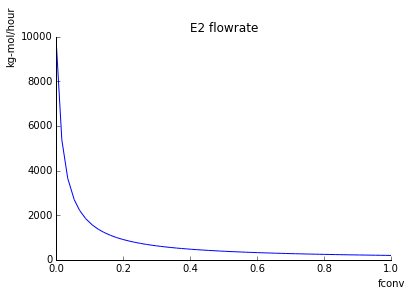

In [14]:
display(sym.Eq(nE2,soln[nE2]))
sym.plot(soln[nE2],(fconv,0,1),xlabel='fconv',ylabel='kg-mol/hour',title='E2 flowrate');

In [15]:
for v in variables:
    display(sym.Eq(v, soln[v]))

X == 4900.0*fconv/(49.0*fconv + 1.0)

nE1 == 196.0

nO1 == 84.5

nEO1 == 0.0

nE2 == 9800.0/(49.0*fconv + 1.0)

nO2 == 100.0*(-1470.0*fconv + 169.0)/(49.0*fconv + 1.0)

nEO2 == 303.092783505155*fconv/(49.0*fconv + 1.0)

nE3 == 9800.0*(-fconv + 1.0)/(49.0*fconv + 1.0)

nO3 == 100.0*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0)

nEO3 == 10103.0927835052*fconv/(49.0*fconv + 1.0)

nE4 == 196.0*(-fconv + 1.0)/(49.0*fconv + 1.0)

nO4 == 0.5*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0)

nEO4 == 9800.0*fconv/(49.0*fconv + 1.0)

nE5 == 9604.0*(-fconv + 1.0)/(49.0*fconv + 1.0)

nO5 == 99.5*(-1519.0*fconv + 169.0)/(49.0*fconv + 1.0)

nEO5 == 303.092783505155*fconv/(49.0*fconv + 1.0)

9800.0*fconv/(8844.5*fconv + 280.5)

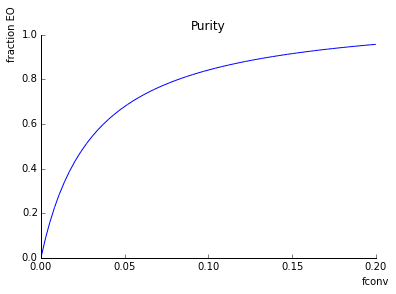

In [16]:
purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])

display(sym.simplify(purity))
sym.plot(purity,(fconv,0,.2),xlabel='fconv',ylabel='fraction EO',title='Purity');

(74.2938*fconv + 2.3562)/(49.0*fconv + 1.0)

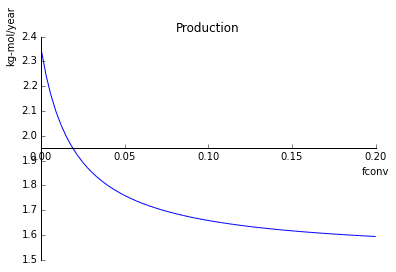

In [17]:
production = 24*350*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000

display(sym.simplify(production))
sym.plot(production,(fconv,0,0.2),xlabel='fconv',ylabel='kg-mol/year',title='Production');

### Parametric Analysis: Fractional Recovery of Ethylene Oxide to Product

Will improving the recovery of Ethylene Oxide to the product stream improve the product purity? Make a prediction, then check against the results of the following calculations.

In [18]:
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1, 84.5)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

frcvr = sym.var('frcvr')
separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, frcvr*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

nE1 == 196.0

nO1 == 84.5

nE2 - nE3 == 0.06*nE2

nE5 == 0.98*nE3

nO5 == 0.995*nO3

nEO4 == frcvr*nEO3

0.724878878656755

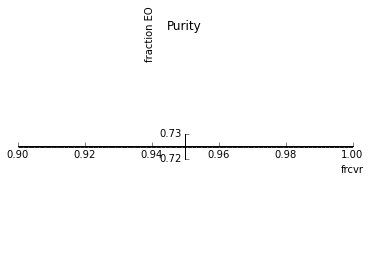

In [19]:
soln = sym.solve(material_balances + specifications, exclude=[frcvr])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])

display(purity)
sym.plot(purity,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='fraction EO',title='Purity');

1.72939796954315

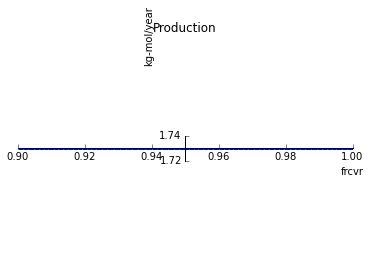

In [20]:
production = 24*350*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000.0
display(production)
sym.plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

#### Discussion Questions

* Is this what you expected?
* Why doesn't the product purity or production depend on the fractional recovery of ethylene oxide in the separator?

### Parametric Analysis: Fractional Recovery of Ethylene to Recycle

Increasing the fraction of ethylene recovered for recycle should improve product purity. Let's see what happens when we raise it.

In [21]:
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1, 84.5)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

frcvr = sym.var('frcvr')
separator_spec = [
    sym.Eq(nE5, frcvr*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

nE1 == 196.0

nO1 == 84.5

nE2 - nE3 == 0.06*nE2

nE5 == frcvr*nE3

nO5 == 0.995*nO3

nEO4 == 0.97*nEO3

-588.0/(13183.5*frcvr - 13731.0)

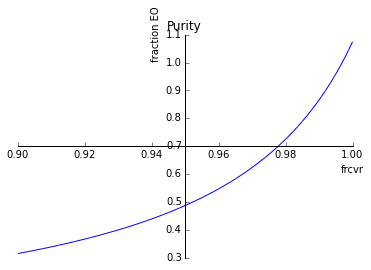

In [22]:
soln = sym.solve(material_balances + specifications,exclude=[frcvr])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
display(sym.simplify(purity))
sym.plot(purity,(frcvr,0.9,1),xlabel='frcvr',ylabel='fraction EO',title='Purity');

(110.7414*frcvr - 115.3404)/(47.0*frcvr - 50.0)

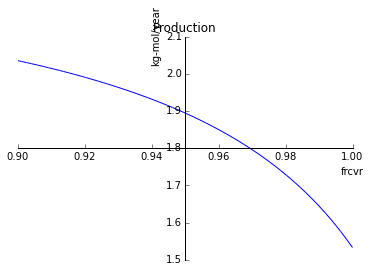

In [23]:
production = 24*350*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000.0
display(sym.simplify(production))
sym.plot(production,(frcvr,0.9,1.00),xlabel='frcvr',ylabel='kg-mol/year',title='Production');

#### Discussion Questions

* Did this behave as you expected?
* Increasing the ethylene recovery to 1.00 leads to a product purity greater than 1.0. Obviously that's not possible. What's going wrong?
* What is the maximum possible recovery of ethylene for recycle?

#### Parametric Analysis: Change the Oxygen Feed Rate

As we've discovered, the oxygen feedrate is not sufficient to consume all of the ethylene. Let's explore what happens if we change the oxygen feedrate.

In [24]:
oxyfeed = sym.var('oxyfeed')
feed_spec = [
    sym.Eq(nE1,196.0),
    sym.Eq(nO1,oxyfeed)]

reactor_spec = [
    sym.Eq(nE2 - nE3, 0.06*nE2)]

separator_spec = [
    sym.Eq(nE5, 0.98*nE3),
    sym.Eq(nO5, 0.995*nO3),
    sym.Eq(nEO4, 0.97*nEO3)]

specifications = feed_spec + reactor_spec + separator_spec
for s in specifications:
    display(s)

nE1 == 196.0

nO1 == oxyfeed

nE2 - nE3 == 0.06*nE2

nE5 == 0.98*nE3

nO5 == 0.995*nO3

nEO4 == 0.97*nEO3

149.238578680203/(oxyfeed + 121.380710659898)

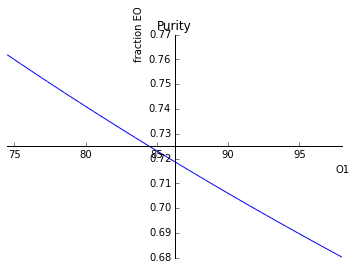

In [25]:
soln = sym.solve(material_balances + specifications, exlude=[oxyfeed])

purity = soln[nEO4]/(soln[nEO4]+soln[nE4]+soln[nO4])
display(sym.simplify(purity))
sym.plot(purity,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='fraction EO',title='Purity');

0.0084*oxyfeed + 1.01959796954315

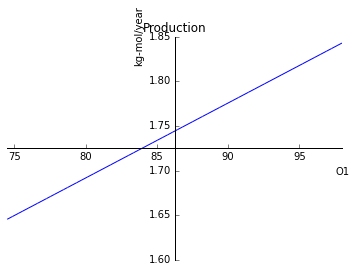

In [26]:
production = 24*350*(soln[nEO4] + soln[nE4] + soln[nO4])/1000000
display(sym.simplify(production))
sym.plot(production,(oxyfeed,74.5,196/2),xlabel='O1',ylabel='kg-mol/year',title='Production');

####     Discussion Questions

* Did this behave as you expected?
* Why did the product purity decrease as the oxygen feedrate was increased?

## Conclusions

* The nominal process specifications yield a product purity of 72.5 mol% and a production of 1.73 million kgmol/year. The product purity falls significantly short of the desired purity of 98 mol%.
* Product purity can be increased by increasing the single-pass reactor conversion, increasing the recovery of ethylene to recycle, and decreasing oxygen feed. Individual, however, these changes are not sufficient to meet to the desired purity.
* Can you find specifications that will meet the 98% product purity specification?